In [1]:
import os
import re
import sys

sys.path.append('/app/scripts/anikin/AI-58/')

import torch
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from torch.nn import MSELoss
import torchvision.models as models



import subprocess

from tqdm import tqdm, trange
from queue import Queue
from threading import Thread

from regressor_on_resnet.flux_dataset import FluxDataset
from regressor_on_resnet.nn_logging import Logger
from regressor_on_resnet.train_common import train_model
from regressor_on_resnet.resnet_regressor import ResnetRegressor
from regressor_on_resnet.pretrained_loader import PretrainedLoader

plt.rcParams['figure.dpi'] = 150

In [2]:
base_run_number = 135
evaluation_result = np.load(f'evaluation_result_{base_run_number}.npy')

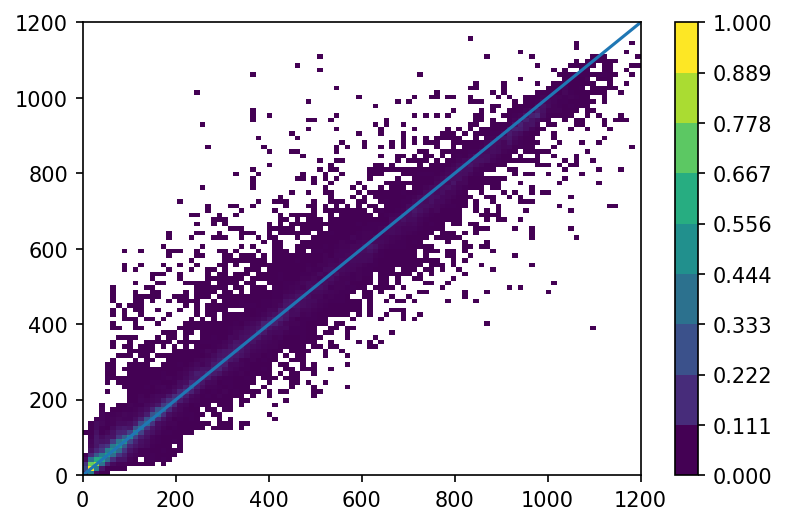

In [3]:
_ = plt.hist2d(evaluation_result[:, 1], evaluation_result[:, 0], bins=100, cmin=1, range=((0, 1200), (0, 1200)))
_ = plt.plot((0, 1200), (0, 1200))
# _ = plt.colorbar(ticks=np.linspace(0, 200, 9, ))

cmap = mpl.cm.viridis
bounds = np.linspace(0, 1, 10)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, 
#                                extend='both'
                              )

plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))

In [4]:
start = 0
stop = 1201
step = 50

intervals = tuple(zip(np.arange(start, stop - step, step), np.arange(start + step, stop, step)))

In [5]:
def get_evaluations(min_val, max_val, array):
    return array[(array[:, 1] >= min_val) & (array[:, 1] < max_val), :]

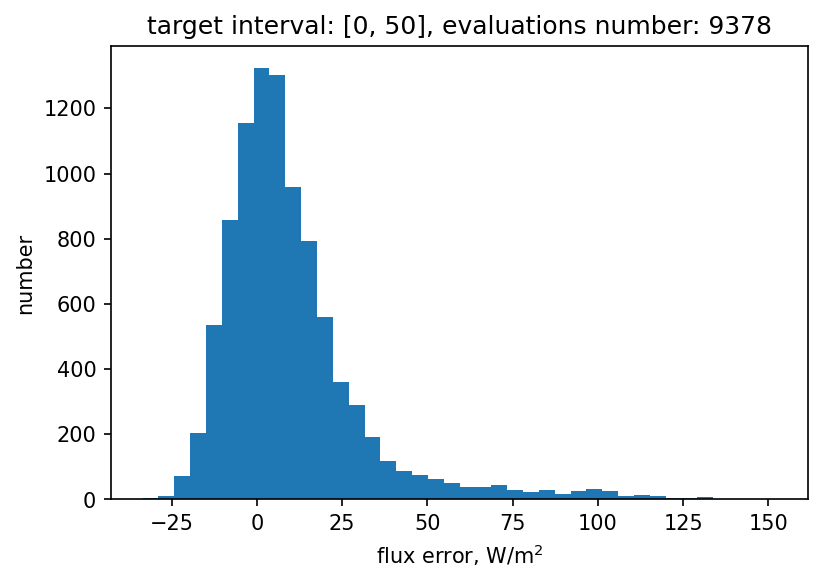

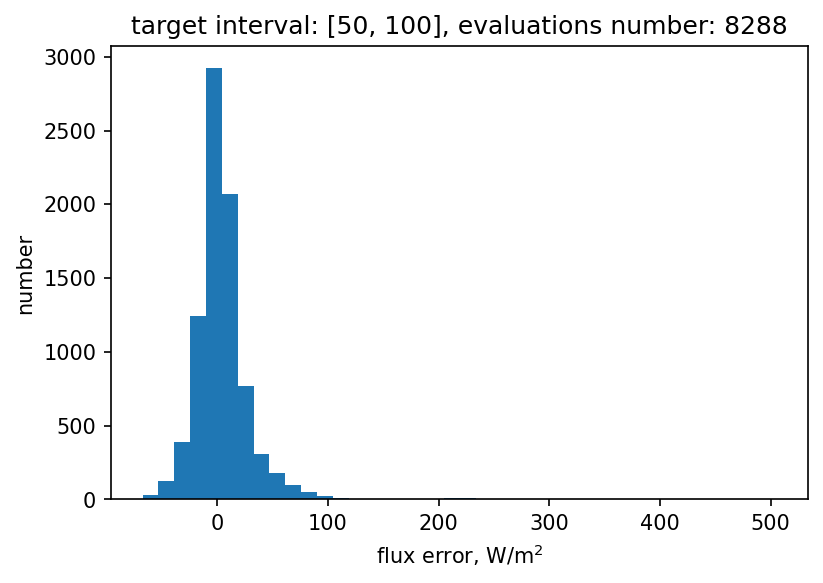

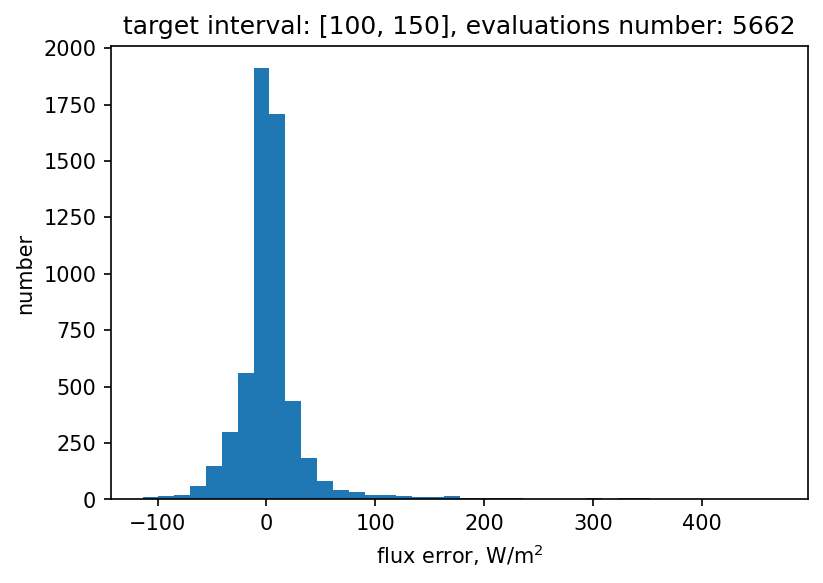

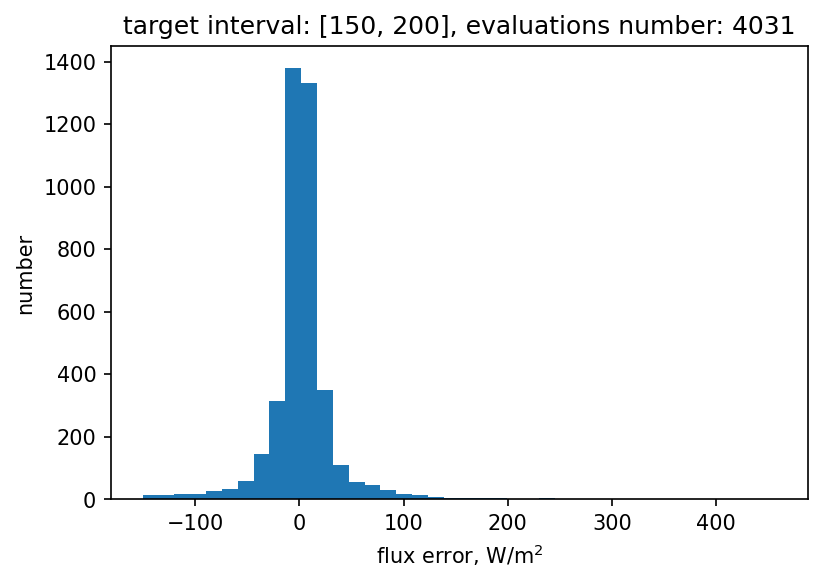

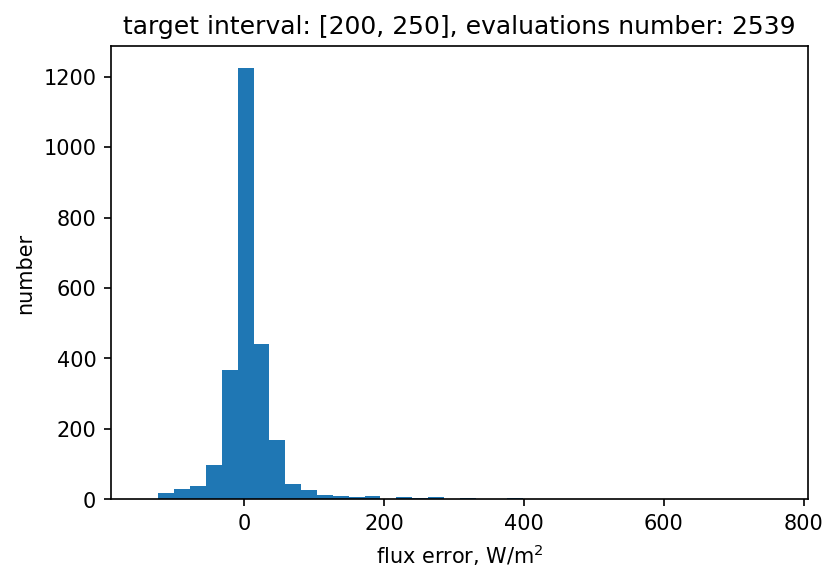

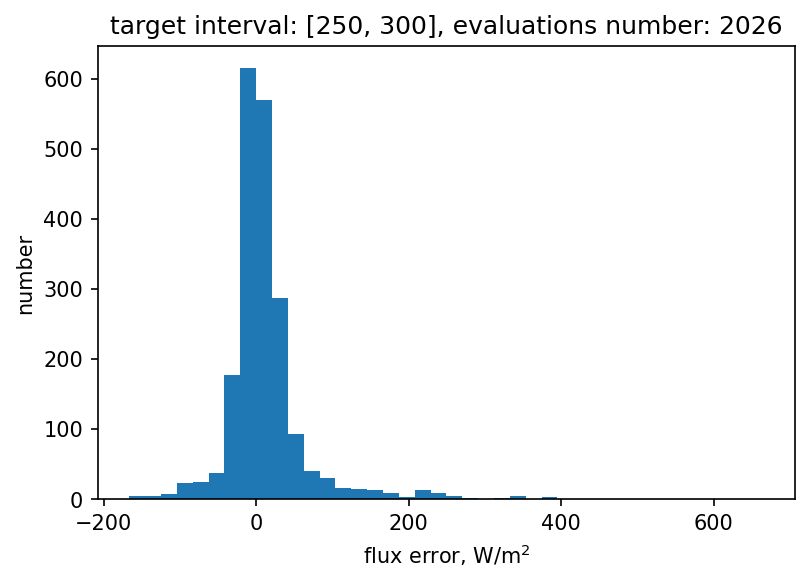

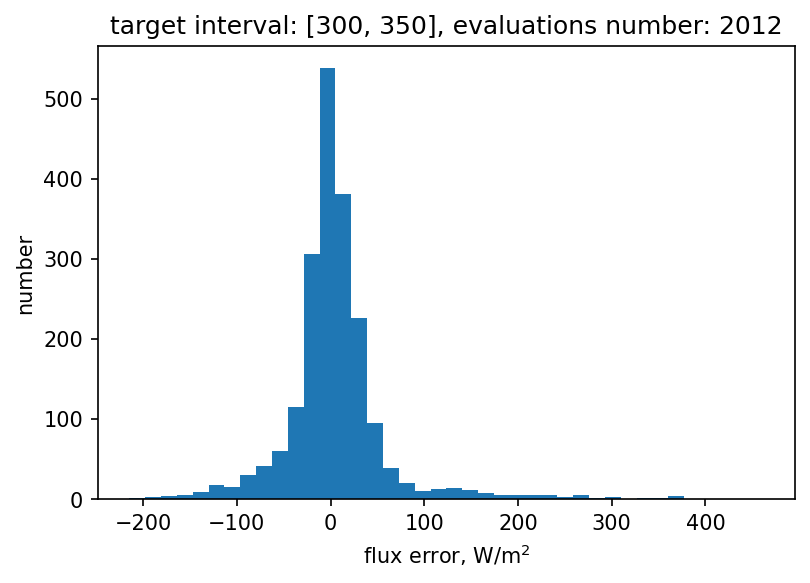

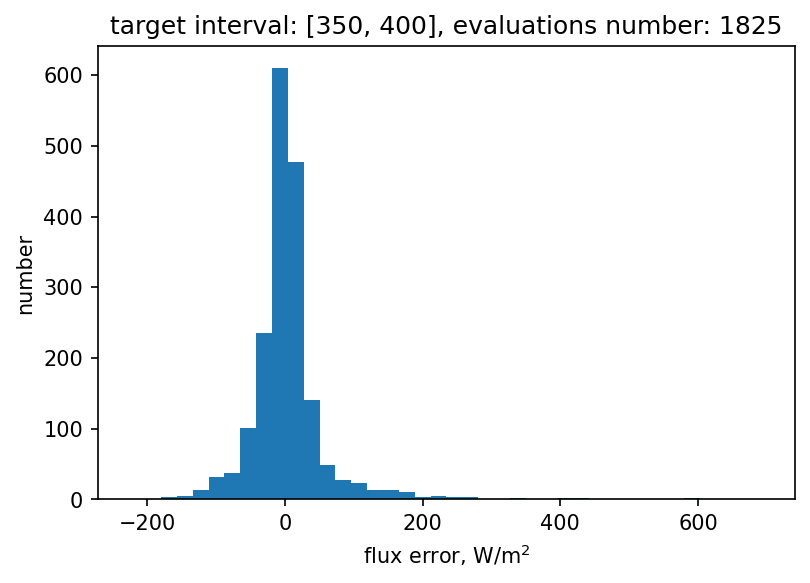

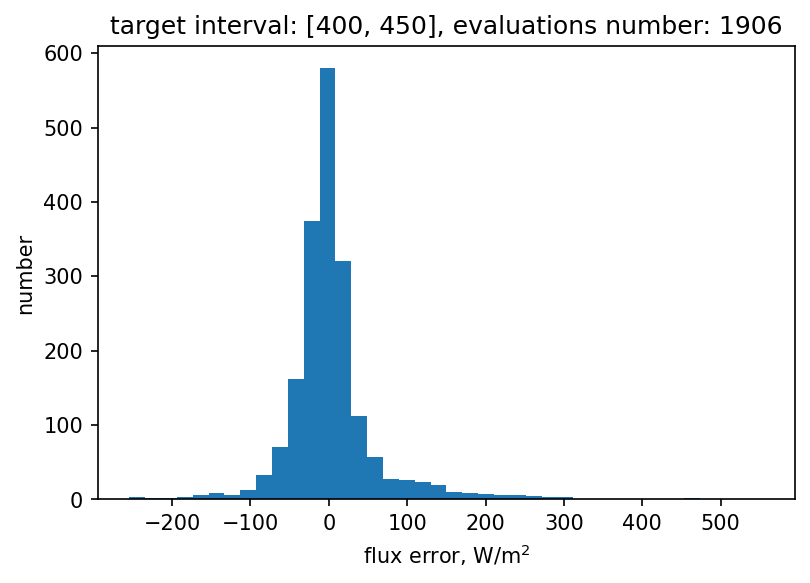

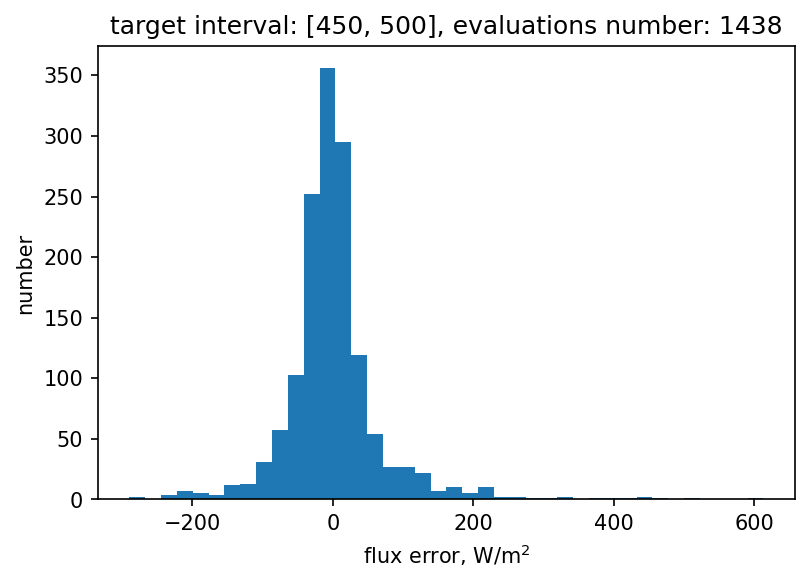

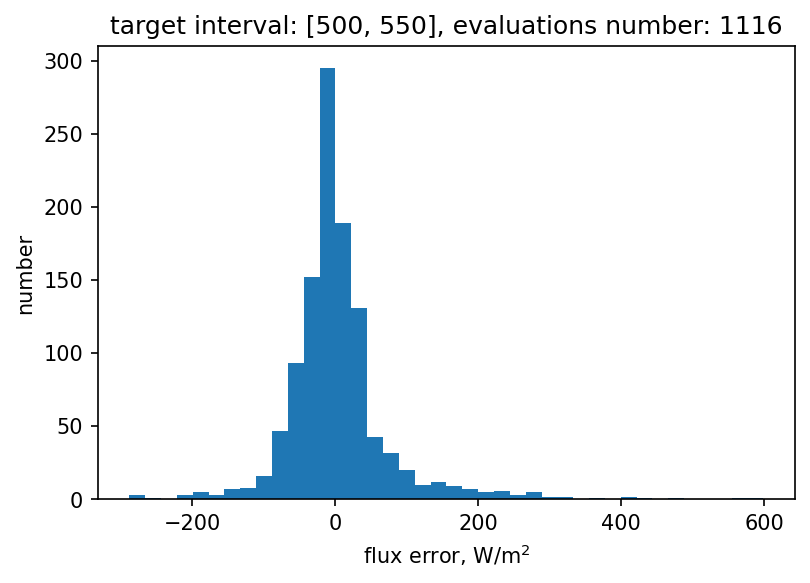

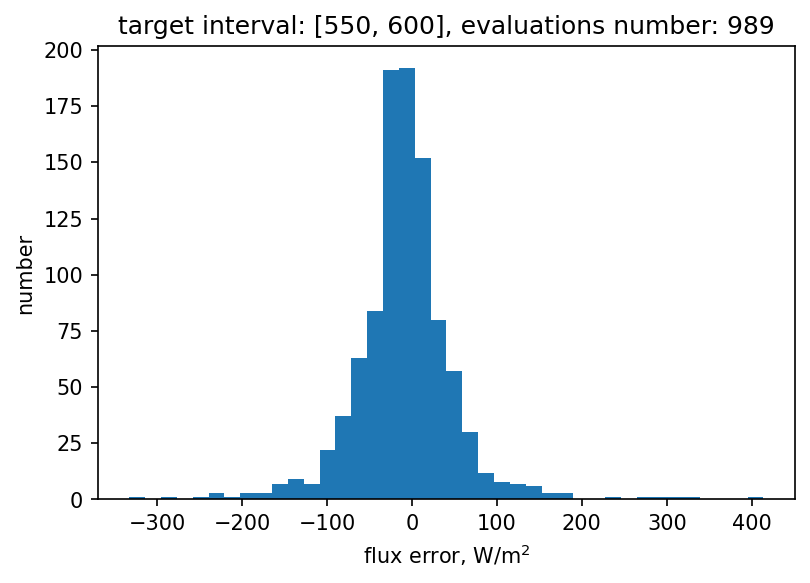

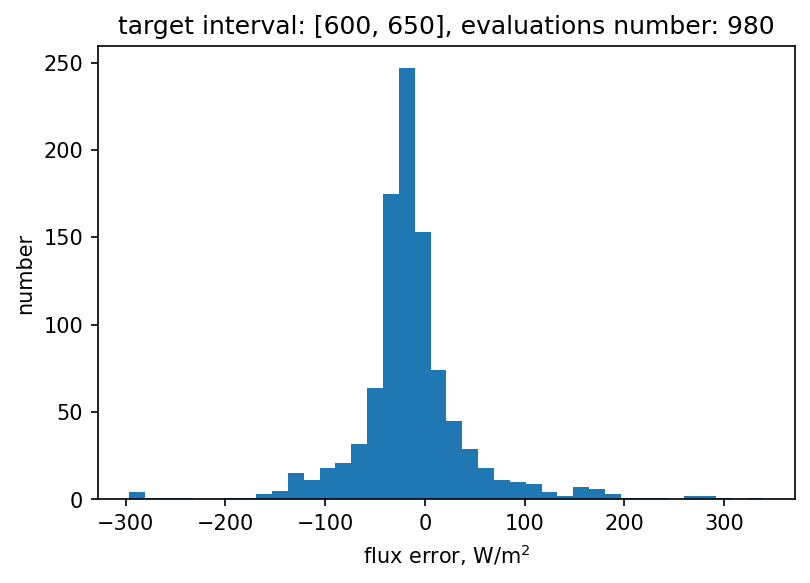

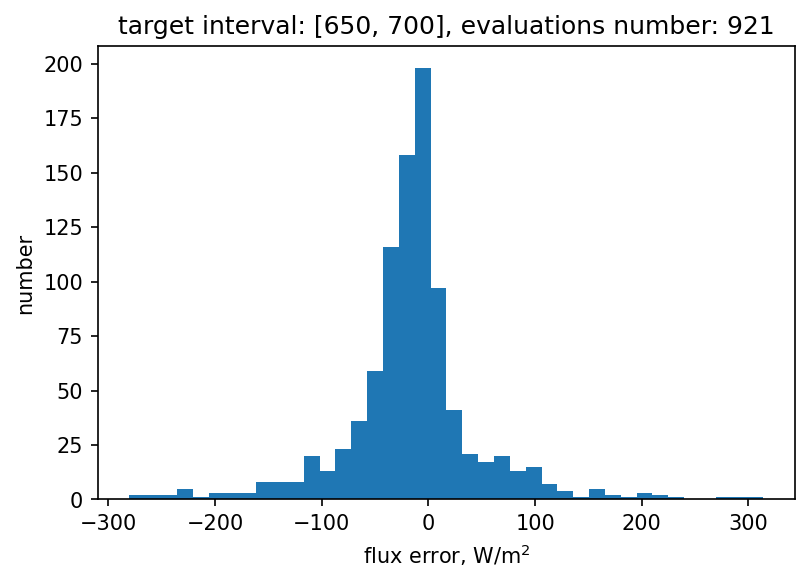

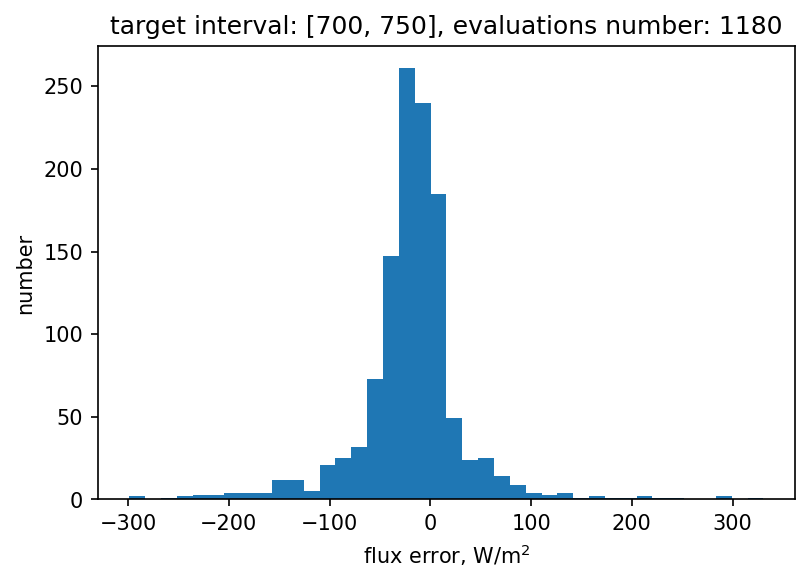

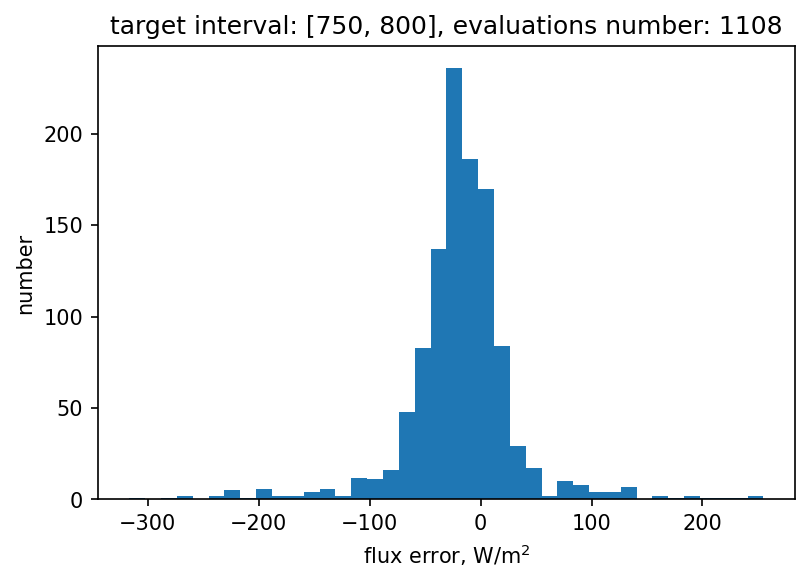

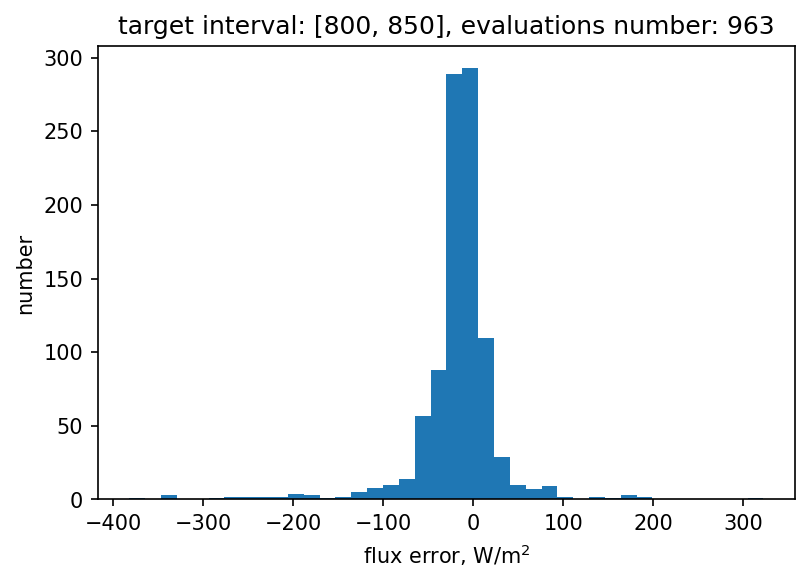

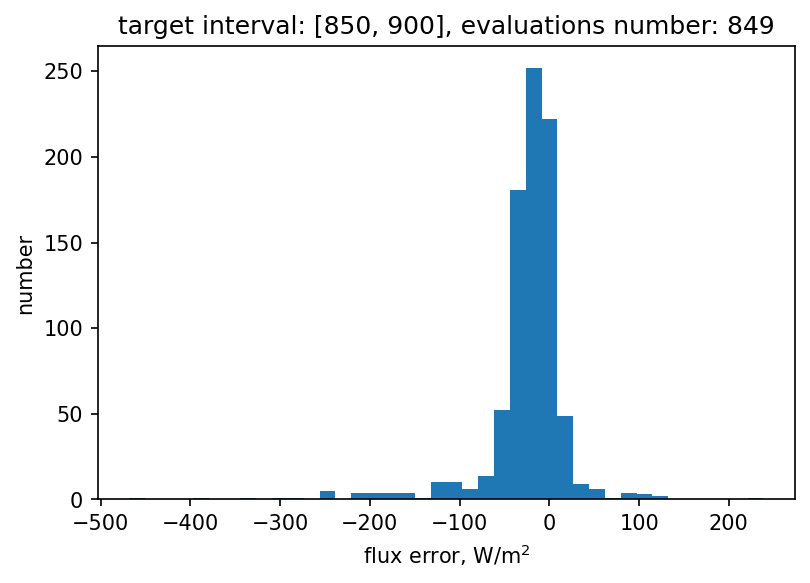

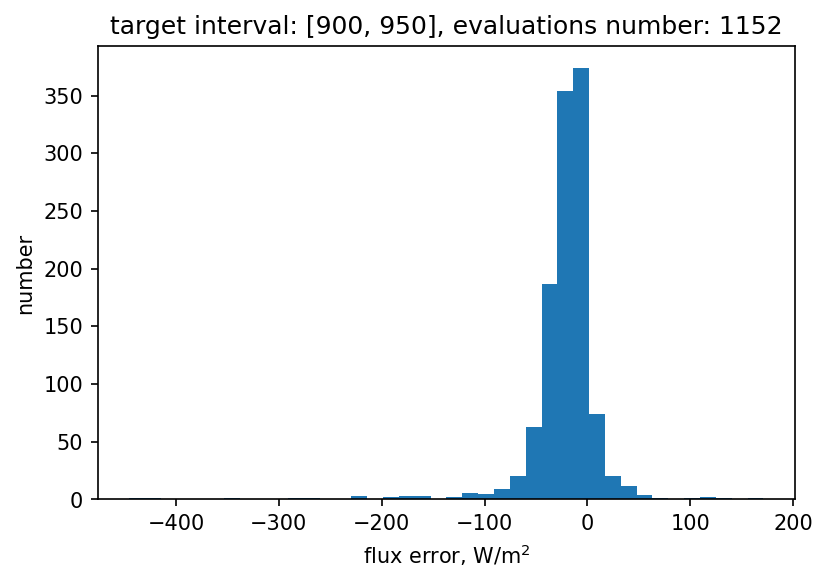

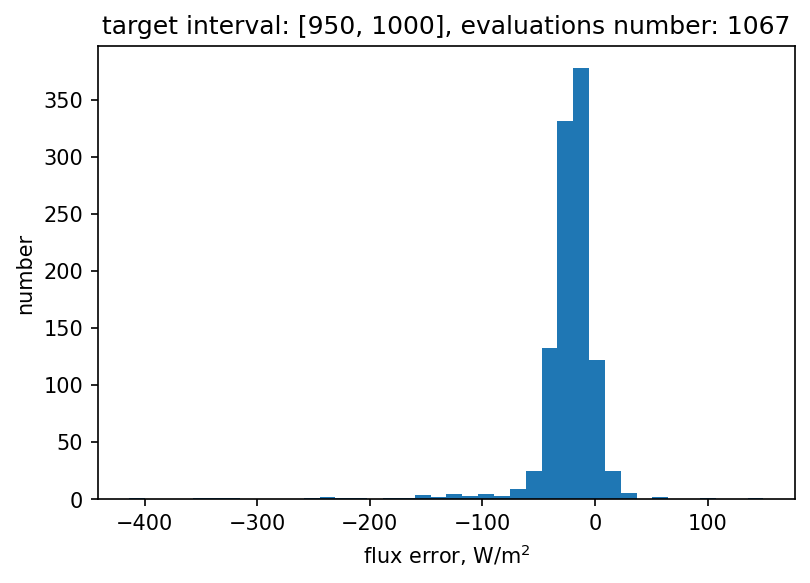

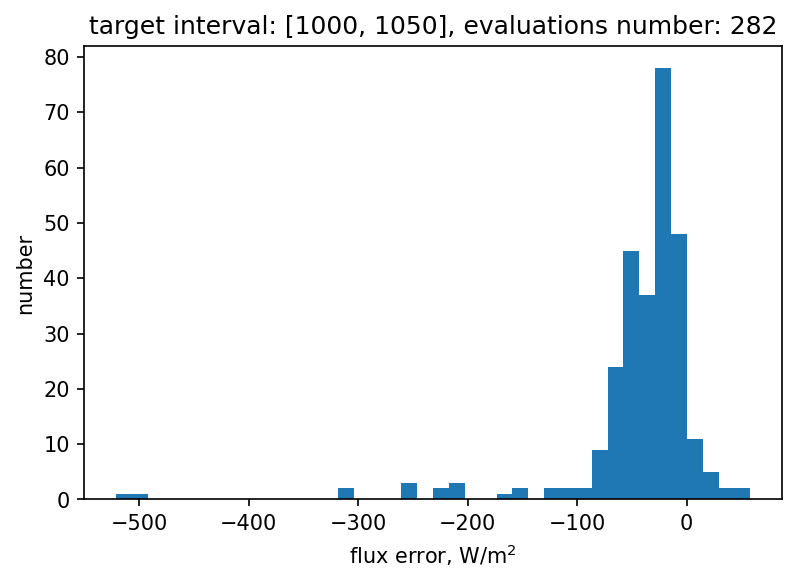

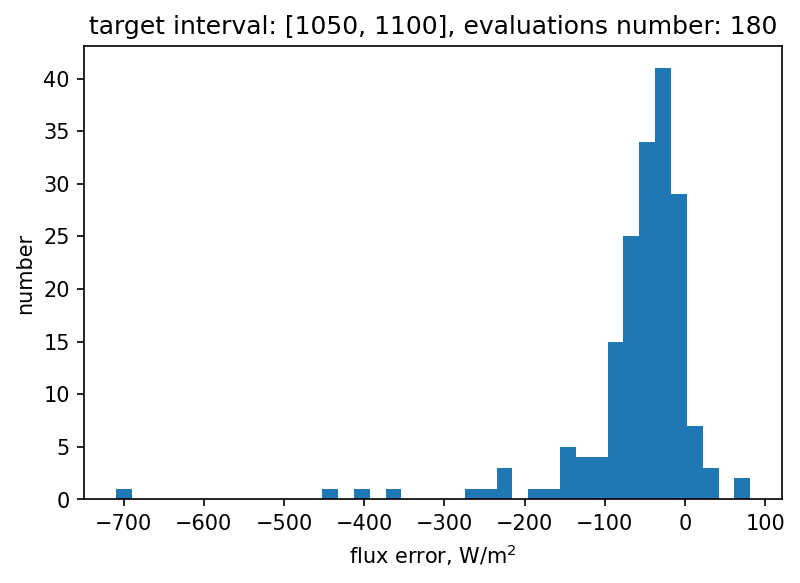

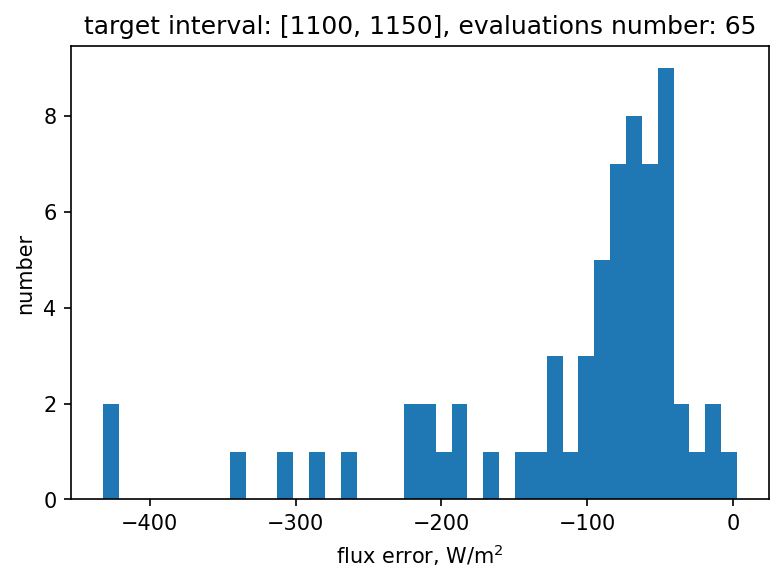

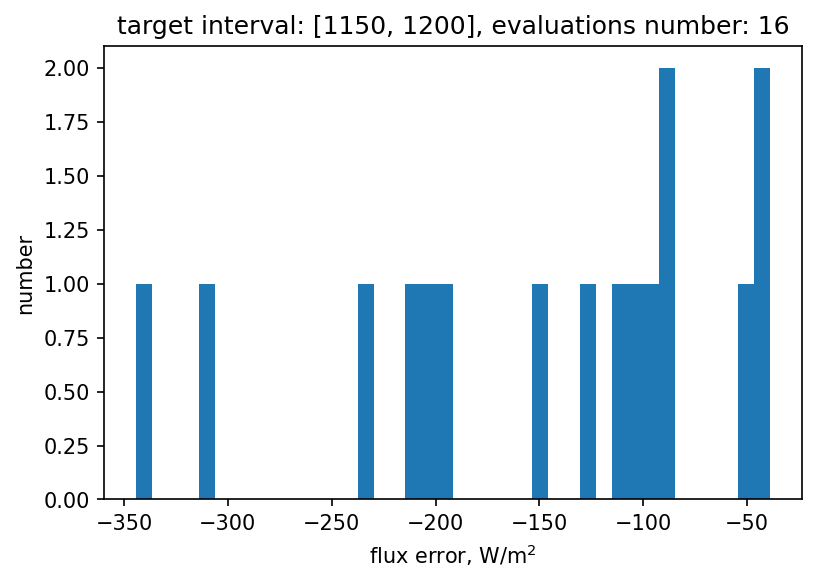

In [6]:
for start_val, stop_val in intervals:
    evaluations = get_evaluations(start_val, stop_val, evaluation_result)
    fig, ax = plt.subplots()
    ax.hist(evaluations[:, 0] - evaluations[:, 1], bins=40)
    ax.set_title(f'target interval: [{start_val}, {stop_val}], evaluations number: {evaluations.shape[0]}')
    ax.set_ylabel("number",)
    ax.set_xlabel(r"flux error, W/m$^2$",)
    plt.show()
    fig.savefig(f'./pics/distrib_run_{base_run_number}_flux_{start_val}_{stop_val}.png')

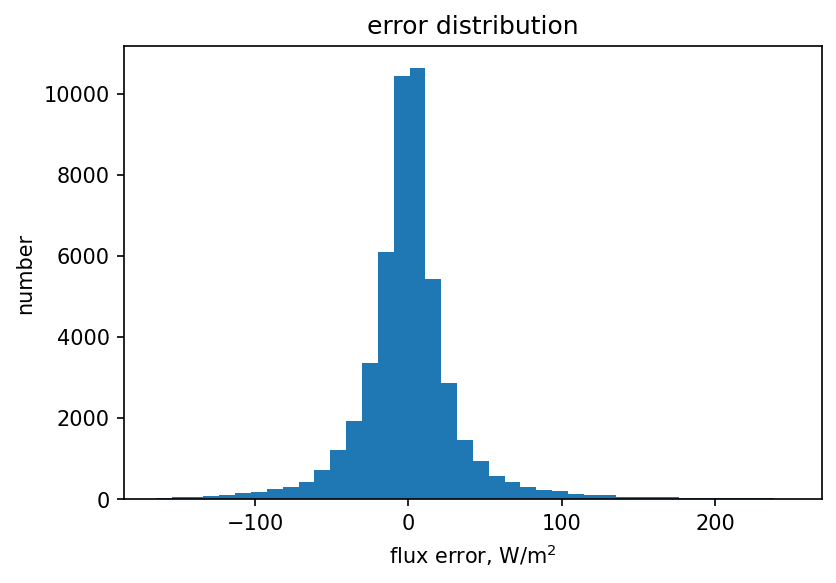

In [7]:
fig, ax = plt.subplots()
error = evaluation_result[:, 0] - evaluation_result[:, 1]
ax.hist(error, bins=40,
        range=(np.percentile(error, 0.5), np.percentile(error, 99.5)),
#         range=(-150, 150)
       )
ax.set_title(f'error distribution')
ax.set_ylabel("number",)
ax.set_xlabel(r"flux error, W/m$^2$",)
plt.show()
fig.savefig(f'./pics/distrib_run_{base_run_number}_whole.png')

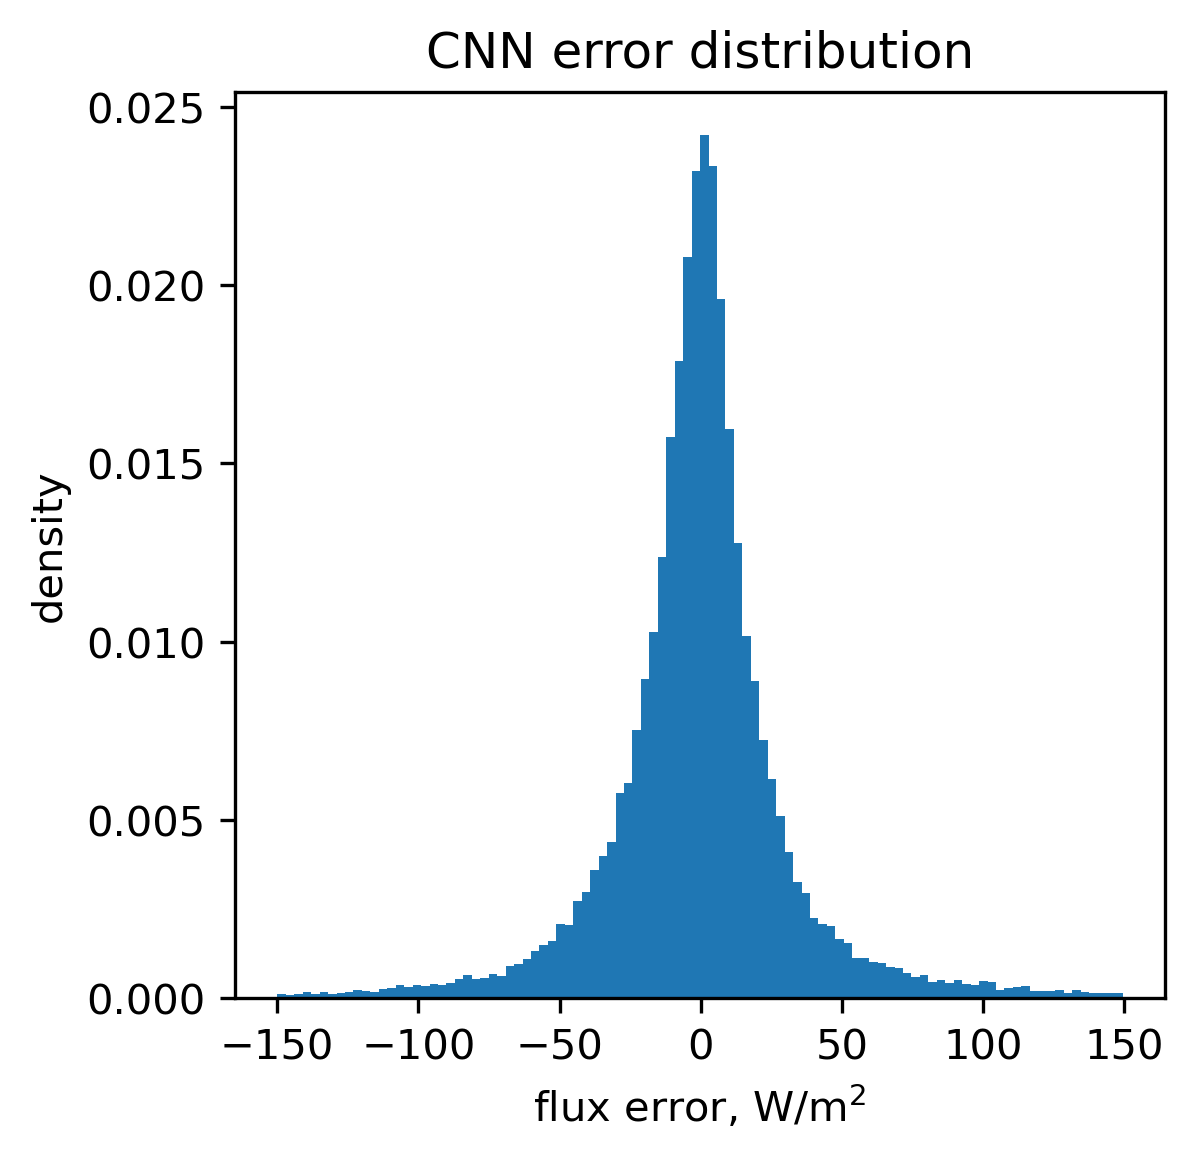

In [8]:
fig = plt.figure(figsize=(4,4), dpi=300)
ax = fig.add_subplot()
error = evaluation_result[:, 0] - evaluation_result[:, 1]
ax.hist(error[(error>-150) & (error<150)] , bins=100, density=True
       )
ax.set_title(f'CNN error distribution')
ax.set_ylabel("density",)
ax.set_xlabel(r"flux error, W/m$^2$",)
plt.show()
fig.savefig(f'./pics/distrib_run_{base_run_number}_whole.png')

In [9]:
target_files = []
pics_dir = os.path.abspath('./pics')
for file in os.listdir(pics_dir):
    if re.match(f'distrib_run_{base_run_number}' + r'.*\.png', file):
        target_files.append(file)

os.chdir(pics_dir)
print(subprocess.run(['tar', 'cfv', f'distrib_run_{base_run_number}.tar', *target_files], ))
os.chdir('..')


distrib_run_135_flux_300_350.png
distrib_run_135_flux_750_800.png
distrib_run_135_flux_0_50.png
distrib_run_135_flux_800_850.png
distrib_run_135_flux_1100_1150.png
distrib_run_135_flux_950_1000.png
distrib_run_135_whole.png
distrib_run_135_flux_350_400.png
distrib_run_135_flux_700_750.png
distrib_run_135_flux_50_100.png
distrib_run_135_flux_450_500.png
distrib_run_135_flux_1050_1100.png
distrib_run_135_flux_850_900.png
distrib_run_135_flux_400_450.png
distrib_run_135_flux_650_700.png
distrib_run_135_flux_500_550.png
distrib_run_135_flux_600_650.png
distrib_run_135_flux_150_200.png
distrib_run_135_flux_1000_1050.png
distrib_run_135_flux_550_600.png
distrib_run_135_flux_900_950.png
distrib_run_135_flux_1150_1200.png
distrib_run_135_flux_100_150.png
distrib_run_135_flux_250_300.png
distrib_run_135_flux_200_250.png
CompletedProcess(args=['tar', 'cfv', 'distrib_run_135.tar', 'distrib_run_135_flux_300_350.png', 'distrib_run_135_flux_750_800.png', 'distrib_run_135_flux_0_50.png', 'distrib_run

In [10]:
os.getcwd()

'/app/scripts/anikin/AI-58/regressor_on_resnet/analysis'

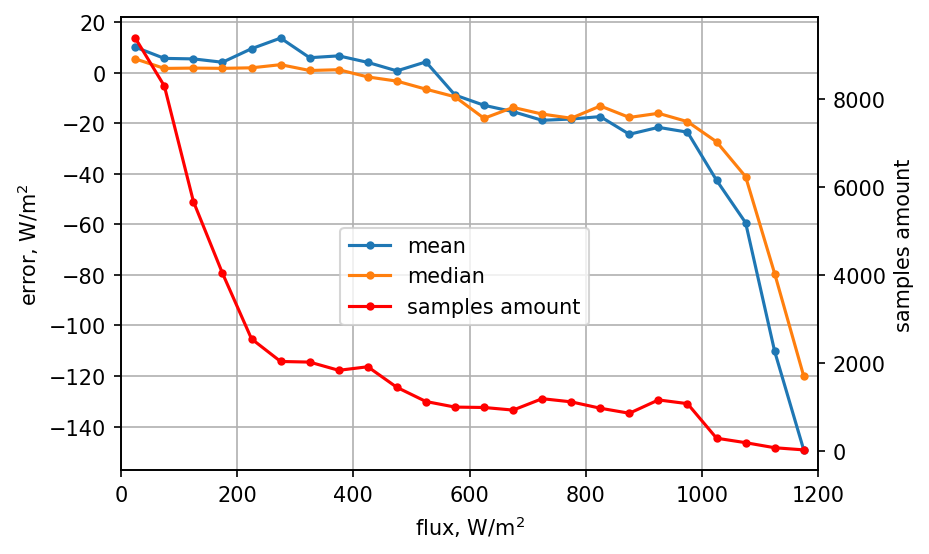

In [11]:
median = []
mean = []
amount = []

for start_val, stop_val in intervals:
    evaluations = get_evaluations(start_val, stop_val, evaluation_result)
    absolute_error = evaluations[:, 0] - evaluations[:, 1]
    median.append(np.median(absolute_error))
    mean.append(np.mean(absolute_error))
    amount.append(evaluations.shape[0])

fig, ax = plt.subplots()
    
x = [np.mean(i) for i in intervals]
ax.plot(x, mean, '.-', label='mean')
ax.plot(x, median, '.-', label='median')
ax.set_ylabel("error, W/m$^2$",)
ax.set_xlabel("flux, W/m$^2$",)
ax.grid()
ax.set_xlim((0, 1200))

ax2 = ax.twinx()
ax2.plot()
ax2.plot()
ax2.plot(x, amount, 'r.-', label='samples amount')
ax2.set_ylabel("samples amount",)

fig.legend(loc='center')
# ax2.legend(loc='center right')

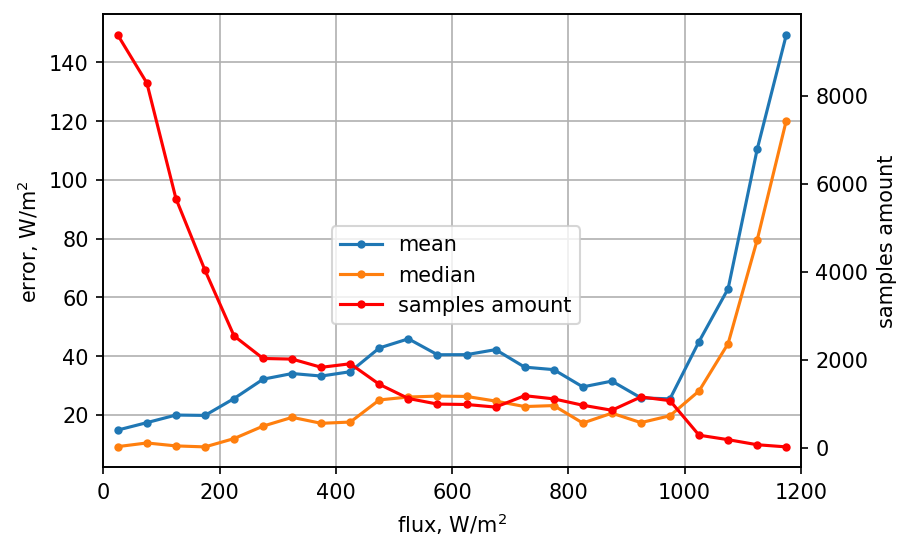

In [12]:
median = []
mean = []
amount = []

for start_val, stop_val in intervals:
    evaluations = get_evaluations(start_val, stop_val, evaluation_result)
    absolute_error = evaluations[:, 0] - evaluations[:, 1]
    absolute_error = np.abs(absolute_error)
    median.append(np.median(absolute_error))
    mean.append(np.mean(absolute_error))
    amount.append(evaluations.shape[0])

fig, ax = plt.subplots()
    
x = [np.mean(i) for i in intervals]
ax.plot(x, mean, '.-', label='mean')
ax.plot(x, median, '.-', label='median')
ax.set_ylabel("error, W/m$^2$",)
ax.set_xlabel("flux, W/m$^2$",)
ax.grid()
ax.set_xlim((0, 1200))

ax2 = ax.twinx()
ax2.plot()
ax2.plot()
ax2.plot(x, amount, 'r.-', label='samples amount')
ax2.set_ylabel("samples amount",)

fig.legend(loc='center')
# ax2.legend(loc='center right')

hist.shape=(32, 32)
x_e.shape=(32,)
3.1663292269308227e-06 0.149228089351697


<AxesSubplot:>

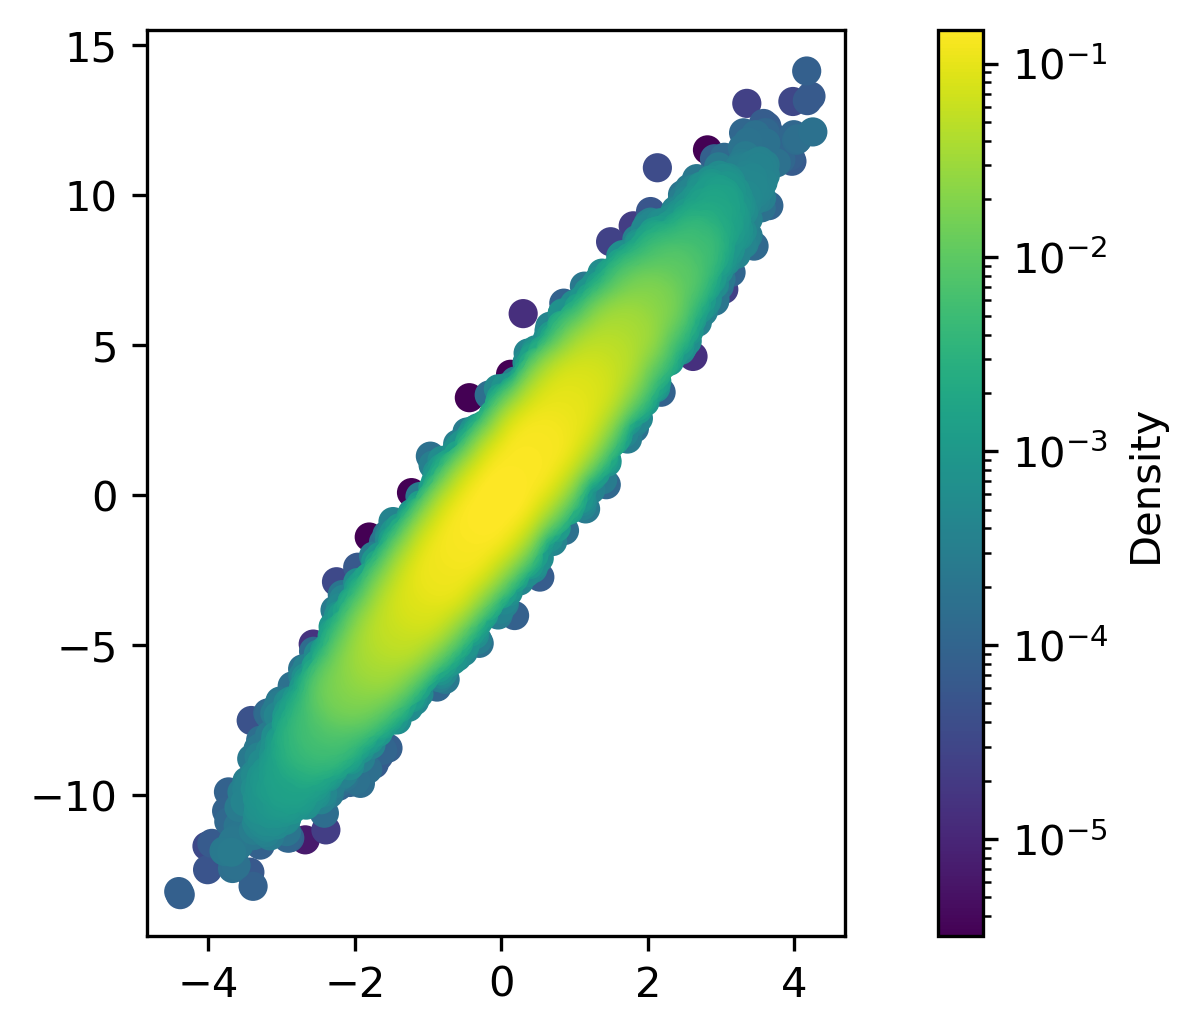

In [14]:
from matplotlib import cm, colors
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(4,4), dpi=300)
    else:
        fig = ax.get_figure()
    hist, x_e, y_e = np.histogram2d(x, y, bins = bins, density=True)
    hist = np.vstack([hist[0:1, :], hist, hist[-1:, :]])
    hist = np.hstack([hist[:, 0:1], hist, hist[:, -1:]])
        
    x_e = np.hstack([x_e[0], 0.5 * (x_e[1:] + x_e[:-1]), x_e[-1]])
    y_e = np.hstack([y_e[0], 0.5 * (y_e[1:] + y_e[:-1]), y_e[-1]])

    print(f'{hist.shape=}\n{x_e.shape=}')

    z = interpn((x_e, y_e), hist, np.vstack([x,y]).T, method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0
    z[np.where(z <= 0)] = np.ma.masked_where(np.where(z <= 0, True, False), z).min()
    # z[np.where(z <= 0)] = z[z.argsort()[1]]


    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
        
    norm=colors.LogNorm(vmin=np.nanmin(z), vmax=np.nanmax(z))
    print(np.min(z), np.max(z))

    ax.scatter(x, y, c=z, norm=norm, **kwargs)

    # norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax, pad=0.1)
    cbar.ax.set_ylabel('Density')

    return ax



x = np.random.normal(size=100000)
y = x * 3 + np.random.normal(size=100000)
density_scatter( x, y, bins = [30,30] )

In [ ]:
for i in range(300, 350, 5):
    print(i, np.log10(10 ** -i))

hist.shape=(32, 32)
x_e.shape=(32,)
7.062741082605175e-10 8.046407719298175e-05


(0.0, 1000.0)

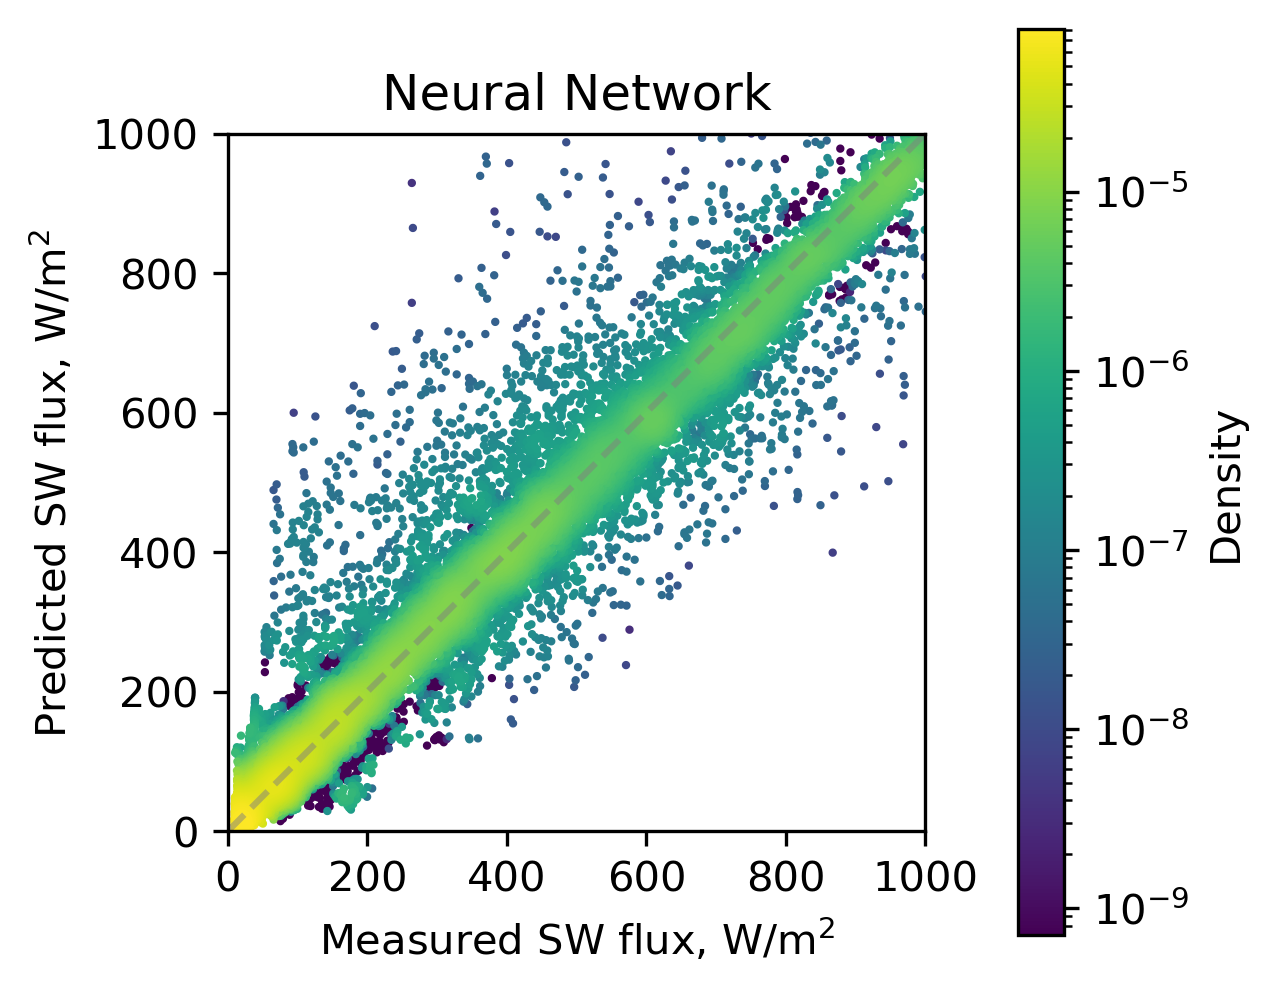

In [15]:
fig = plt.figure(figsize=(4,4), dpi=300)
ax = plt.subplot(aspect='equal')
ax = density_scatter(evaluation_result[:, 1], evaluation_result[:, 0], ax=ax, sort=True,  bins = [30, 30], s=1)
ax.plot((0, 1200), (0, 1200), '--', c='grey', alpha=0.5)
ax.set_title('Neural Network')
ax.set_xlabel('Measured SW flux, W/m$^2$')
ax.set_ylabel('Predicted SW flux, W/m$^2$')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)

(0.0, 1000.0)

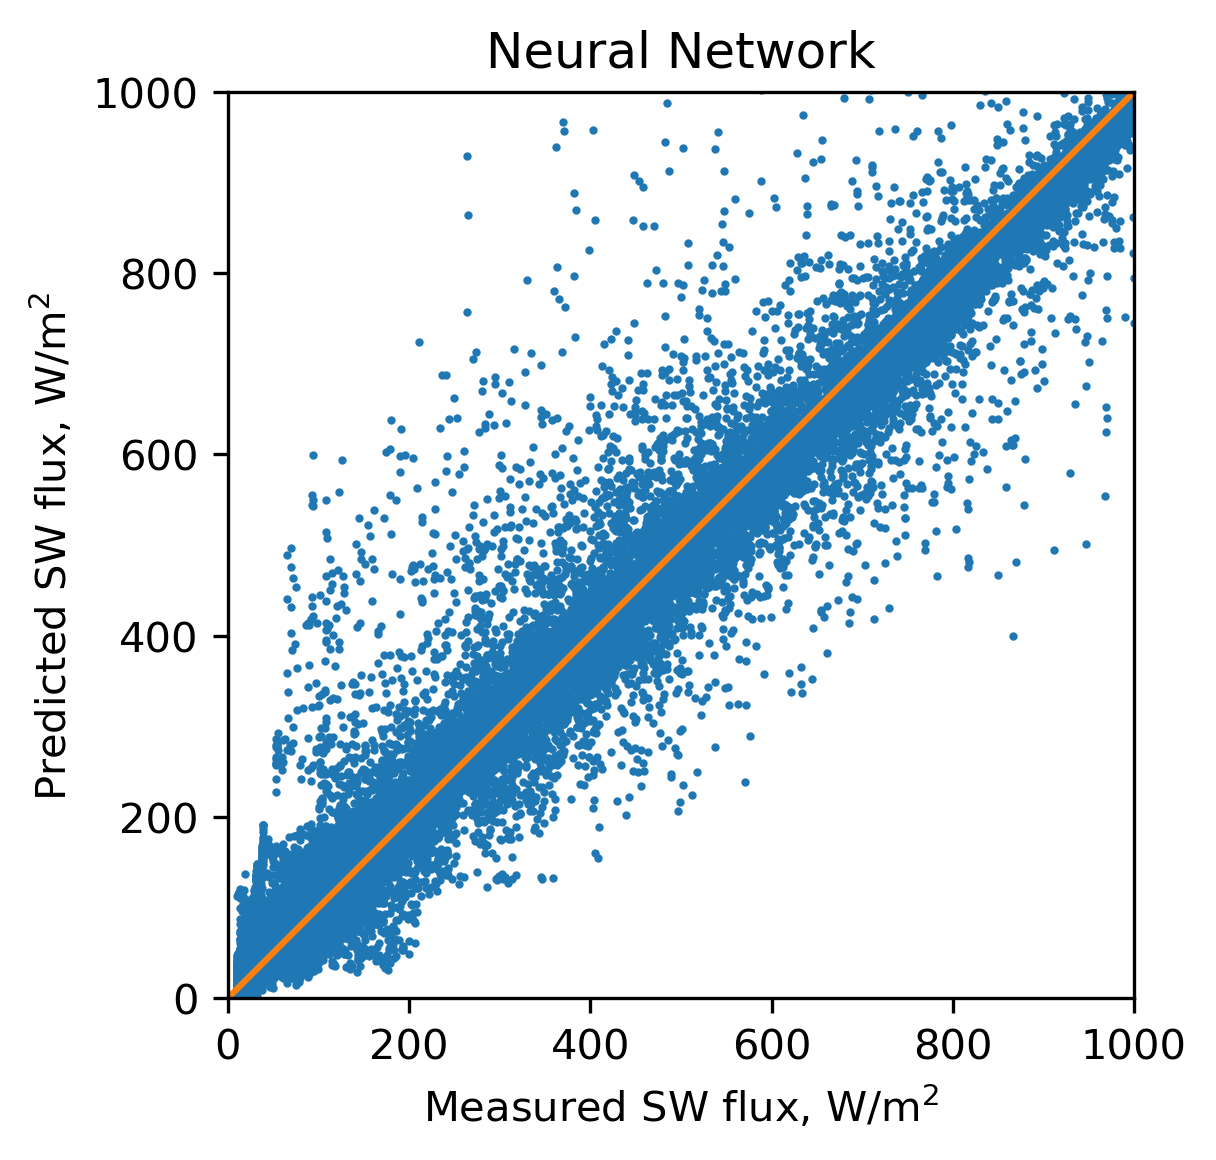

In [16]:
fig = plt.figure(figsize=(4,4), dpi=300)
ax = plt.subplot(aspect='equal')
ax.scatter(evaluation_result[:, 1], evaluation_result[:, 0], s=1)
ax.plot(0, 0)
ax.plot((0, 1200), (0, 1200))
ax.set_title('Neural Network')
ax.set_xlabel('Measured SW flux, W/m$^2$')
ax.set_ylabel('Predicted SW flux, W/m$^2$')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)

In [17]:
loss = MSELoss()

In [18]:
rmse = (np.square(evaluation_result[:, 1] -  evaluation_result[:, 0])).mean()**0.5

In [19]:
print(f'{rmse = }')

rmse = 47.88078693481949


In [ ]:
mask = np.array([[1, 2], [3, 4]])
np.tile(mask, [1, 3, 1])

In [ ]:
mask

In [ ]:
np.repeat(mask[:, :, np.newaxis], 3, axis=2).shape